<a href="https://colab.research.google.com/github/yashveersinghsohi/Hospital_Mortality_Prediction/blob/master/Hospital_01_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data files

In [2]:
root_dir_path = "https://raw.githubusercontent.com/yashveersinghsohi/Hospital_Mortality_Prediction/master/Data/"
data_path = root_dir_path + "data.csv"
train_path = root_dir_path + "train.csv"
val_path = root_dir_path + "val.csv"
test_path = root_dir_path + "test.csv"

In [3]:
data = pd.read_csv(data_path)
train = pd.read_csv(train_path)
val = pd.read_csv(val_path)
test = pd.read_csv(test_path)

In [4]:
print("Train shape - ", train.shape)
print("Val shape - ", val.shape)
print("Test shape - ", test.shape)

Train shape -  (952, 69)
Val shape -  (106, 69)
Test shape -  (118, 69)


# Types of features

In [5]:
demographic_cols = ["BMI", "age", "gendera", "group"]

vitals_cols = [
  "heart rate", "Systolic blood pressure", "Diastolic blood pressure", 
  "Respiratory rate", "temperature", "SP O2", "Urine output"
]

comorbid_cols = [
  "hypertensive", "atrialfibrillation", "diabetes", 
  "depression", "Hyperlipemia", "CHD with no MI", 
  "Renal failure", "COPD", "deficiencyanemias"         
]

lab_cols = [
  "hematocrit", "RBC", "MCH", "MCHC", "MCV", "RDW", 
  "Leucocyte", "Platelets", "Neutrophils", "Basophils", 
  "Lymphocyte", "PT", "INR", "NT-proBNP", "Creatine kinase", 
  "Creatinine", "Urea nitrogen", "glucose", "Blood potassium", 
  "Blood sodium", "Blood calcium", "Chloride", "Anion gap", 
  "Magnesium ion", "PH", "Bicarbonate", "Lactic acid", "PCO2", "EF"
]

target_cols = ["outcome"]

missing_cols = [
  "BMI_was_missing", 
  "heart rate_was_missing", 
  "Systolic blood pressure_was_missing", 
  "Diastolic blood pressure_was_missing",
  "Respiratory rate_was_missing",
  "temperature_was_missing",
  "SP O2_was_missing",
  "Urine output_was_missing",
  "Neutrophils_was_missing",
  "Basophils_was_missing",
  "Lymphocyte_was_missing",
  "PT_was_missing",
  "INR_was_missing",
  "Creatine kinase_was_missing",
  "glucose_was_missing",
  "Blood calcium_was_missing",
  "PH_was_missing",
  "Lactic acid_was_missing",
  "PCO2_was_missing"
]

# Creating datasets for models

In [6]:
train_features = pd.DataFrame()
train_targets = train[target_cols]

val_features = pd.DataFrame()
val_targets = val[target_cols]

test_features = pd.DataFrame()
test_targets = test[target_cols]

In [7]:
print("Train targets shape - ", train_targets.shape)
print("Val targets shape - ", val_targets.shape)
print("Test targets shape - ", test_targets.shape)

Train targets shape -  (952, 1)
Val targets shape -  (106, 1)
Test targets shape -  (118, 1)


## Demographic Features

Since Gender and group columns did not help in splitting the target distribution, we will remove them from the analysis.

In [8]:
demographic_features = ["BMI", "age"]
for feature in demographic_features:
  train_features[feature] = train[feature]
  val_features[feature] = val[feature]
  test_features[feature] = test[feature]

## Vitals Features

Since none of these features helped in splitting the target distribution effectively, I am dropping all of these.

## Comorbitities Features

Since `CHD with no MI` did not help in splitting the target distribution convincingly, I am dropping that feature.

In [9]:
comorbid_features = [
  "hypertensive", "atrialfibrillation", "diabetes", 
  "depression", "Hyperlipemia",  "Renal failure", 
  "COPD", "deficiencyanemias"         
]

for feature in comorbid_features:
  train_features[feature] = train[feature]
  val_features[feature] = val[feature]
  test_features[feature] = test[feature]

## Lab Tests

I am keeping all these features and adding 2 dummies for each feature - one for mid 95 percentile, and the other for top 5 percentile. In this approach the lower 5 percentile is the basis dummy and is removed to ensure that there is no multicolinearity

In [10]:
lab_features = [
  "hematocrit", "RBC", "MCH", "MCHC", "MCV", "RDW", 
  "Leucocyte", "Platelets", "Neutrophils", "Basophils", 
  "Lymphocyte", "PT", "INR", "NT-proBNP", "Creatine kinase", 
  "Creatinine", "Urea nitrogen", "glucose", "Blood potassium", 
  "Blood sodium", "Blood calcium", "Chloride", "Anion gap", 
  "Magnesium ion", "PH", "Bicarbonate", "Lactic acid", "PCO2", "EF"
]

for feature in lab_features:
  # Copying original features
  train_features[feature] = train[feature]
  val_features[feature] = val[feature]
  test_features[feature] = test[feature]

  # Calculating 5th and 95th quantile from the train set
  q5 = train[feature].quantile(0.05)
  q95 = train[feature].quantile(0.95)

  # Creating dummies for the train set
  train_features[feature+"_mid"] = np.where(
      ((train_features[feature]>=q5) & (train_features[feature]<=q95)),
      1, 0
    )
  train_features[feature+"_upper"] = np.where(
      train_features[feature]>q95,
      1, 0
    )
  
  # Creating dummies for the val set
  val_features[feature+"_mid"] = np.where(
      ((val_features[feature]>=q5) & (val_features[feature]<=q95)),
      1, 0
    )
  val_features[feature+"_upper"] = np.where(
      val_features[feature]>q95,
      1, 0
    )
  
  # Creating dummies for the test set
  test_features[feature+"_mid"] = np.where(
      ((test_features[feature]>=q5) & (test_features[feature]<=q95)),
      1, 0
    )
  test_features[feature+"_upper"] = np.where(
      test_features[feature]>q95,
      1, 0
    )

## Missing columns

These were created in the EDA notebook only, and so just need to copy them into new datasets

In [11]:
missing_features = [
  "BMI_was_missing", 
  "heart rate_was_missing", 
  "Systolic blood pressure_was_missing", 
  "Diastolic blood pressure_was_missing",
  "Respiratory rate_was_missing",
  "temperature_was_missing",
  "SP O2_was_missing",
  "Urine output_was_missing",
  "Neutrophils_was_missing",
  "Basophils_was_missing",
  "Lymphocyte_was_missing",
  "PT_was_missing",
  "INR_was_missing",
  "Creatine kinase_was_missing",
  "glucose_was_missing",
  "Blood calcium_was_missing",
  "PH_was_missing",
  "Lactic acid_was_missing",
  "PCO2_was_missing"
]

for feature in missing_features:
  train_features[feature] = train[feature]
  val_features[feature] = val[feature]
  test_features[feature] = test[feature]

# Exporting final datasets

In [12]:
print("Train features shape - ", train_features.shape)
print("Val features shape - ", val_features.shape)
print("Test features shape - ", test_features.shape)

Train features shape -  (952, 116)
Val features shape -  (106, 116)
Test features shape -  (118, 116)


In [13]:
train_features.to_csv("train_features.csv", index=False)
train_targets.to_csv("train_targets.csv", index=False)

val_features.to_csv("val_features.csv", index=False)
val_targets.to_csv("val_targets.csv", index=False)

test_features.to_csv("test_features.csv", index=False)
test_targets.to_csv("test_targets.csv", index=False)

# Correlation Matrix (heatmap)

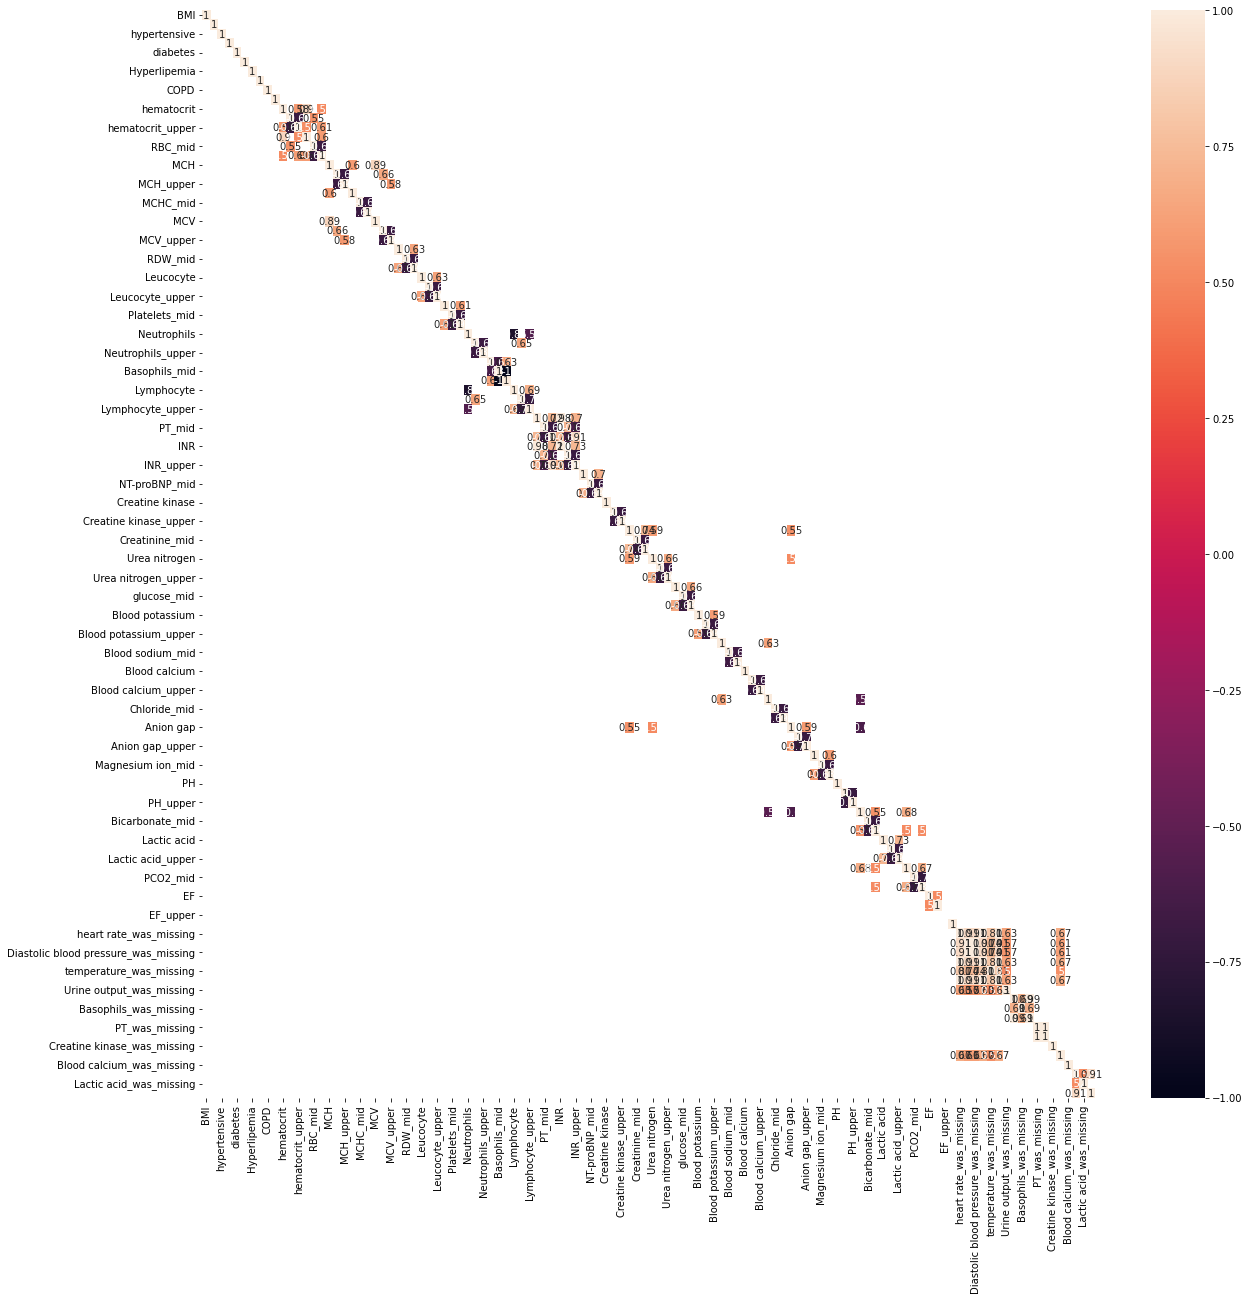

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
corr_df = train_features.corr()
sns.heatmap(corr_df, annot=True, mask=(corr_df).abs()<0.5, ax=ax)
plt.show()